In [1]:
from dataclasses import dataclass

import pandas as pd
#pandas-> Data Analysis

import numpy as np
#mathematical operations on arrays

import matplotlib.pyplot as plt
#plots
import seaborn as sns
#Works easily with the df and pds

from datetime import date, datetime

from sklearn.preprocessing import MinMaxScaler

In [2]:
train_df = pd.read_csv('train.csv',parse_dates=['Open Date'])
test_df = pd.read_csv('test.csv',parse_dates=['Open Date'])

In [3]:
train_df.shape, test_df.shape

((137, 43), (100000, 42))

In [4]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
train_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [6]:
test_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,28867.657797,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,99999.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [7]:
train_df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [8]:
test_df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

<AxesSubplot:>

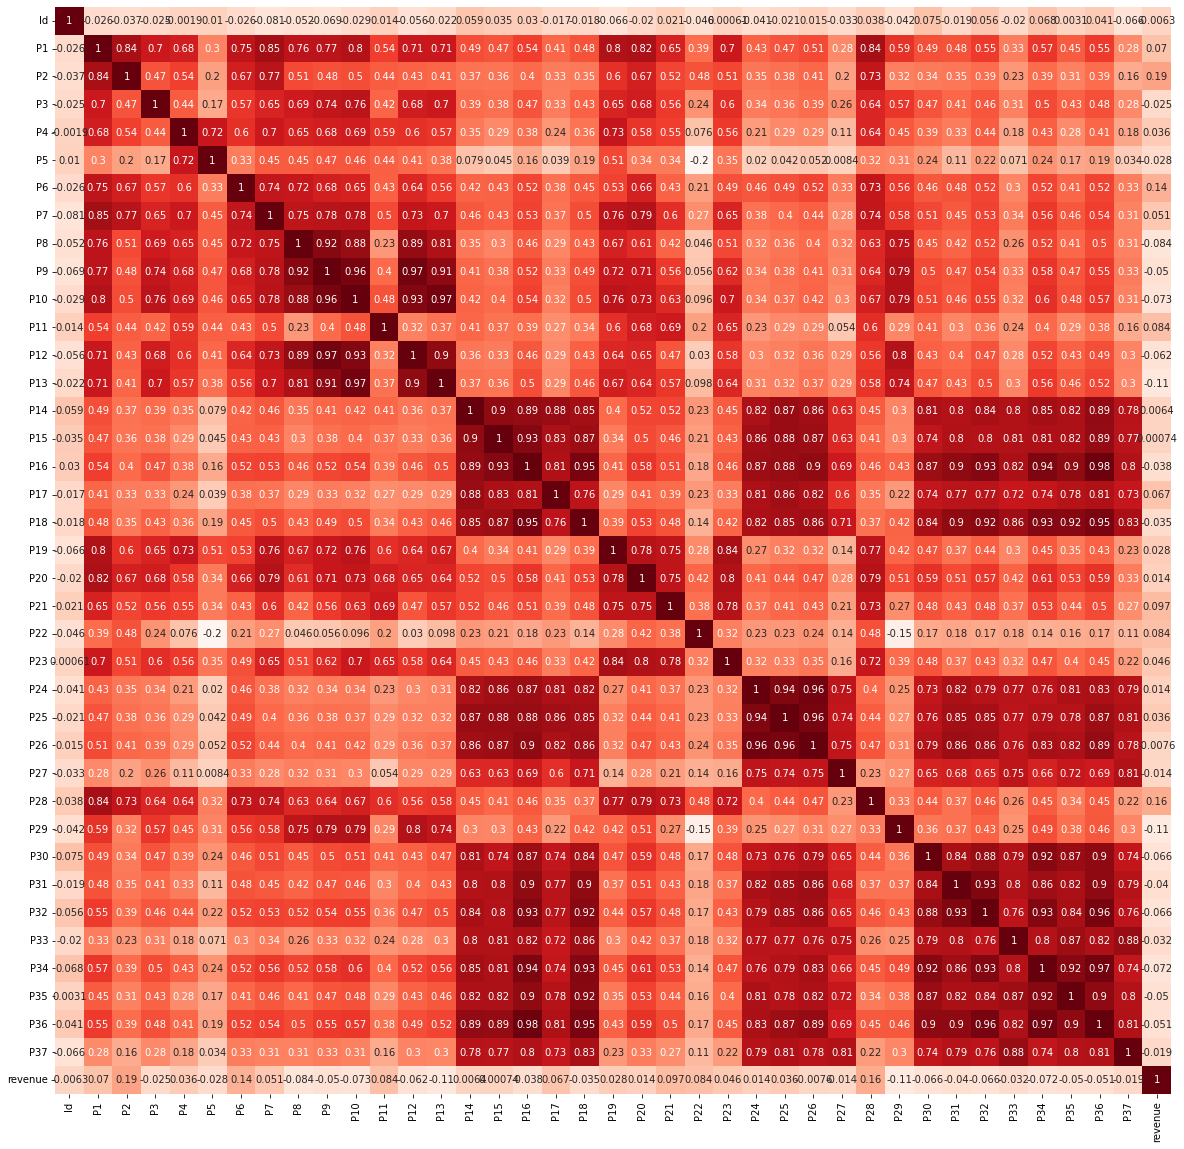

In [9]:
# to get summary of data
def print_cols():
    print(train_df.columns)

plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),annot=True, cbar=False, cmap='Reds')

In [10]:
print_cols()

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


<AxesSubplot:xlabel='revenue'>

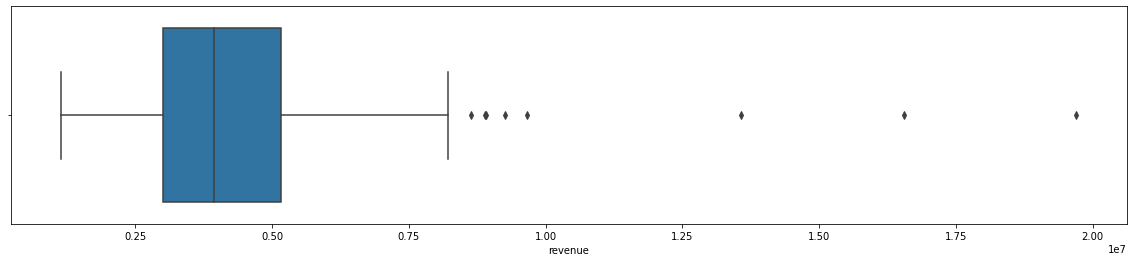

In [11]:
plt.figure(figsize=(20,4))
sns.boxplot(x='revenue',data=train_df)#outliers

In [12]:
# inter quartile range
from scipy.stats import iqr

upper_limit = train_df.revenue.quantile(0.75) + (1.5* iqr(train_df.revenue))
lower_limit = train_df.revenue.quantile(0.25)- (1.5* iqr(train_df.revenue))

condition = (train_df.revenue > upper_limit) | (train_df.revenue<lower_limit)
train_df[condition]

rev_filter = (train_df.revenue < 10000000)
train_df = train_df[rev_filter]

In [13]:
train_df.shape

(134, 43)

In [14]:
#To get characteristics of the data ---> EDA(Exploratory data analysis)
len(train_df.Id.unique()) == train_df.shape[0]

len(test_df.Id.unique()) == test_df.shape[0]

train_df.drop('Id',axis=1,inplace=True)
test_df.drop('Id', axis=1, inplace=True)

In [15]:
train_df.shape, test_df.shape

((134, 42), (100000, 41))

In [16]:
train_df['Open Date'].value_counts()

2012-02-02    2
2010-02-23    2
1999-07-17    1
2012-06-08    1
2013-08-08    1
             ..
2009-06-01    1
2011-02-09    1
2009-03-28    1
2011-01-18    1
2009-09-01    1
Name: Open Date, Length: 132, dtype: int64

In [17]:
train_df['open_year'] = train_df['Open Date'].dt.year
# Do it to the test data

In [18]:
test_df['open_year'] = test_df['Open Date'].dt.year

In [19]:
train_df['City Group'].value_counts()

Big Cities    75
Other         59
Name: City Group, dtype: int64

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

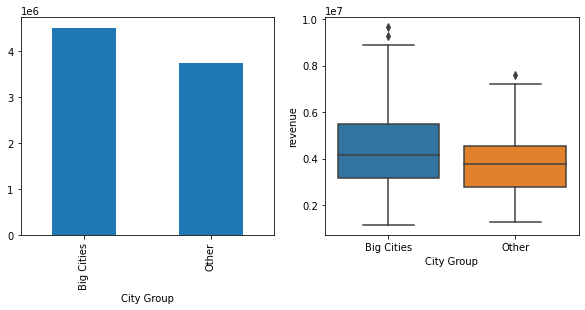

In [20]:
#visualizing data acc. with open yr
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
train_df.groupby(['City Group']).mean()['revenue'].plot.bar(ax=ax1)
sns.boxplot(x='City Group',y='revenue', data=train_df,ax=ax2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Adana'),
  Text(0, 1, 'Afyonkarahisar'),
  Text(0, 2, 'Amasya'),
  Text(0, 3, 'Ankara'),
  Text(0, 4, 'Antalya'),
  Text(0, 5, 'Aydın'),
  Text(0, 6, 'Balıkesir'),
  Text(0, 7, 'Bolu'),
  Text(0, 8, 'Bursa'),
  Text(0, 9, 'Denizli'),
  Text(0, 10, 'Diyarbakır'),
  Text(0, 11, 'Edirne'),
  Text(0, 12, 'Elazığ'),
  Text(0, 13, 'Eskişehir'),
  Text(0, 14, 'Gaziantep'),
  Text(0, 15, 'Isparta'),
  Text(0, 16, 'Karabük'),
  Text(0, 17, 'Kastamonu'),
  Text(0, 18, 'Kayseri'),
  Text(0, 19, 'Kocaeli'),
  Text(0, 20, 'Konya'),
  Text(0, 21, 'Kütahya'),
  Text(0, 22, 'Kırklareli'),
  Text(0, 23, 'Muğla'),
  Text(0, 24, 'Osmaniye'),
  Text(0, 25, 'Sakarya'),
  Text(0, 26, 'Samsun'),
  Text(0, 27, 'Tekirdağ'),
  Text(0, 28, 'Tokat'),
  Text(0, 29, 'Trabzon'),
  Text(0, 30, 'Uşak'),
  Text(0, 31, 'İstanbul'),
  Text(0, 32, 'İzmir'),

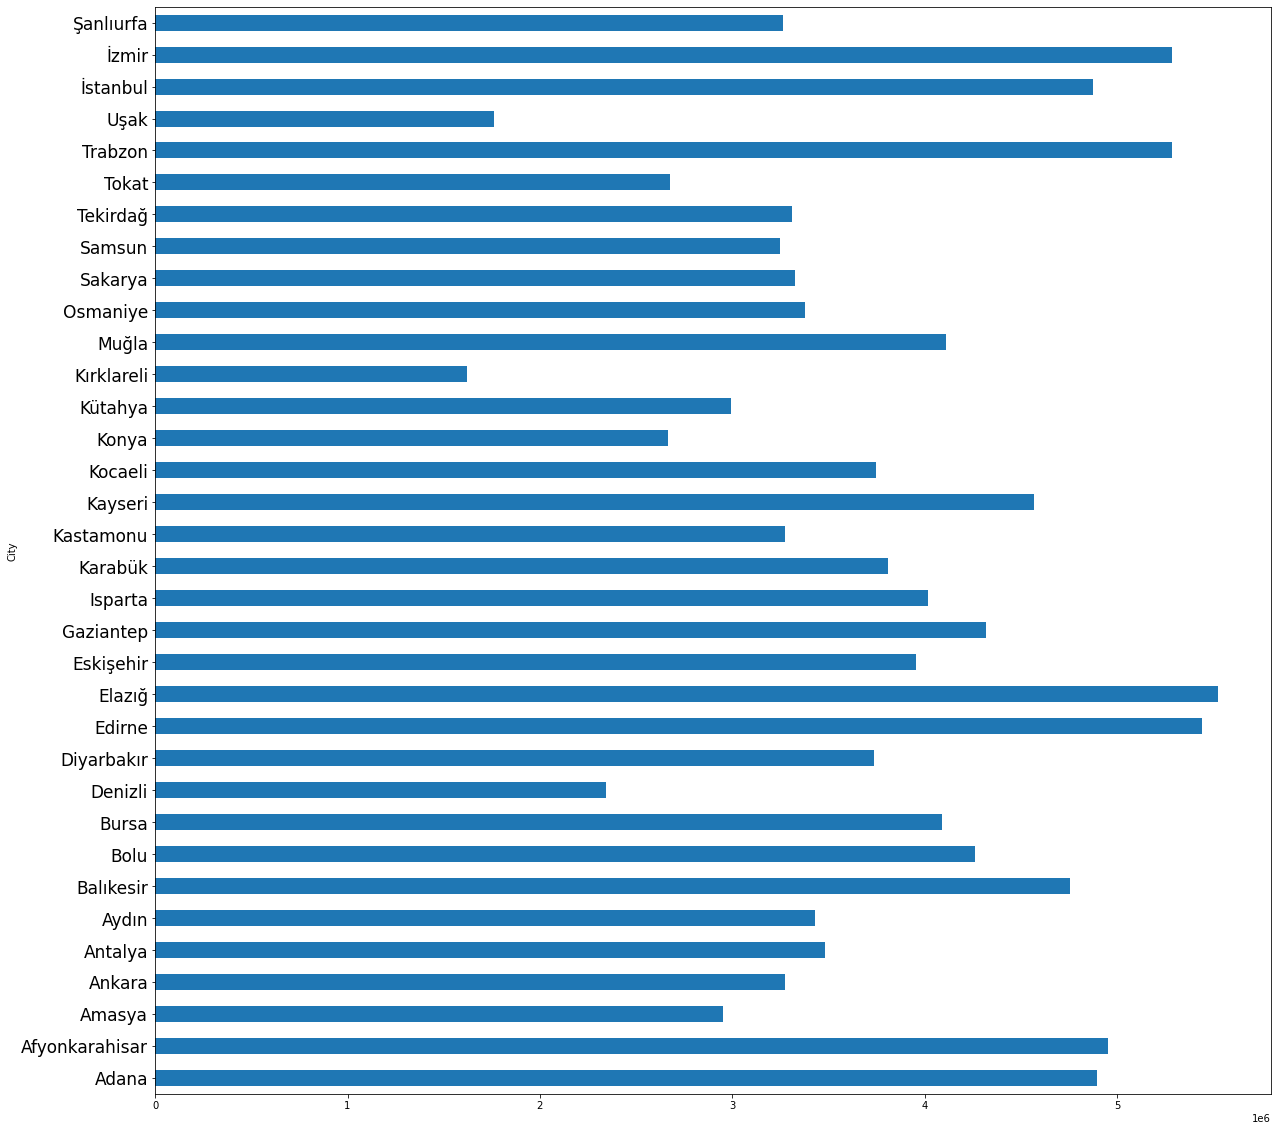

In [21]:
train_df.groupby(['City']).mean()['revenue'].plot.barh(figsize=(20,20))
plt.yticks(fontsize=17)


In [22]:
len(train_df.City.unique()) ,len(test_df.City.unique())

(34, 57)

In [23]:
train_df.drop('City',axis=1,inplace=True)
test_df.drop('City',axis=1,inplace=True)

In [24]:
print_cols()

Index(['Open Date', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue', 'open_year'],
      dtype='object')


In [25]:
train_df.Type.value_counts()

FC    74
IL    59
DT     1
Name: Type, dtype: int64

In [26]:
train_df.loc[124,'Type'] = 'IL'

In [27]:
test_df.Type.value_counts()

FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64

D:\Virtual_Environments\fer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


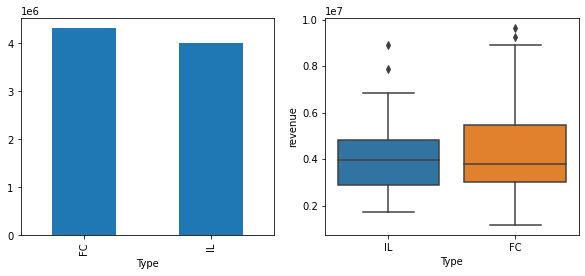

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
train_df.groupby(['Type']).mean()['revenue'].plot.bar(ax=ax1)
sns.boxplot(train_df.Type, train_df.revenue,ax=ax2)
plt.show()

In [29]:
train_df.P1.value_counts()

2     36
4     34
3     30
12    12
1      9
6      6
9      4
5      3
Name: P1, dtype: int64

In [30]:
train_df.head()

,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,open_year
0,1999-07-17,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,1999
1,2008-02-14,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,2008
2,2013-03-09,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,2013
3,2012-02-02,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,2012
4,2009-05-09,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,2009


In [31]:
test_df.head()

,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,open_year
0,2011-01-22,Other,FC,1,4.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,2011
1,2011-03-18,Other,IL,3,4.0,4.0,4.0,2,2,5,...,3.0,0,0,0,0,0,0,0,0,2011
2,2013-10-30,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,...,3.0,0,0,0,0,0,0,0,0,2013
3,2013-05-06,Other,IL,2,4.0,4.0,4.0,2,3,5,...,3.0,0,4,0,0,0,0,0,0,2013
4,2013-07-31,Other,FC,2,4.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,2013


In [32]:
comp_df = pd.concat([train_df, test_df])
comp_df.reset_index(drop=True, inplace=True)

In [33]:
comp_df.Type.value_counts(),comp_df['City Group'].value_counts()

(FC    57093
 IL    40507
 DT     2244
 MB      290
 Name: Type, dtype: int64,
 Other         50787
 Big Cities    49347
 Name: City Group, dtype: int64)

In [34]:
comp_df.Type = comp_df.Type.map({'MB':0,'DT':1, 'IL':2,'FC':3})
comp_df['City Group'] = comp_df['City Group'].map({'Big Cities':1, 'Other':0})

In [35]:
comp_df.head(3)

,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,open_year
0,1999-07-17,1,2,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,1999
1,2008-02-14,1,3,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,2008
2,2013-03-09,0,2,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,2013


In [36]:
#Normzalization using minmaxscaler
p_name = ['P'+str(i) for i in range(1,38)]
comp_df[p_name] = MinMaxScaler().fit_transform(comp_df[p_name])

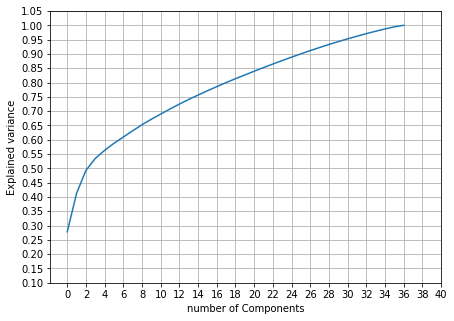

In [37]:
#Principal component Analysis
from sklearn.decomposition import PCA
pca = PCA().fit(comp_df[p_name])
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of Components')
plt.ylabel('Explained variance')
plt.yticks(np.arange(0.1,1.1,0.05))
plt.xticks(np.arange(0,41,2))
plt.grid(True)

In [38]:
pca_list = ['pca'+str(i) for i in range(1,30,1)]
comp_df[pca_list] = PCA(n_components=29).fit_transform(comp_df[p_name])
comp_df.drop(p_name,axis=1,inplace=True)

In [39]:
comp_df

,Open Date,City Group,Type,revenue,open_year,pca1,pca2,pca3,pca4,pca5,...,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29
0,1999-07-17,1,2,5653753.0,1999,0.243606,-0.527510,-0.045521,-0.206594,-0.125026,...,-0.037017,0.016193,0.031345,0.059000,0.016255,0.048220,-0.054702,0.029028,0.026632,0.042975
1,2008-02-14,1,3,6923131.0,2008,-0.471515,0.170770,0.177746,-0.226293,-0.126229,...,0.012382,-0.005679,-0.007500,0.028185,-0.009157,-0.021811,0.022046,0.036122,0.031528,0.001586
2,2013-03-09,0,2,2055379.0,2013,-0.597651,0.198493,-0.333930,-0.040836,-0.090928,...,-0.030305,0.052252,-0.007101,-0.063996,-0.037576,0.019852,-0.075007,-0.016819,-0.039074,-0.020373
3,2012-02-02,0,2,2675511.0,2012,2.482674,0.059977,-0.910912,-0.065020,0.209007,...,-0.164486,0.103718,0.204524,-0.020188,0.117540,-0.107868,0.034265,0.003802,-0.079669,0.205567
4,2009-05-09,0,2,4316715.0,2009,-0.009296,-0.450832,-0.315341,-0.238763,-0.087733,...,0.003893,0.033759,0.020665,-0.008124,0.040790,0.154162,0.000591,-0.001348,-0.038915,-0.049402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100129,2000-01-05,0,3,NaN,2000,-0.564011,0.026138,0.264120,0.067066,-0.129262,...,-0.000809,-0.107038,-0.010477,-0.065874,0.054019,-0.052606,0.050158,-0.005580,-0.009870,-0.003340
100130,2011-07-18,0,2,NaN,2011,-0.772675,-0.044185,-0.426603,-0.085292,0.355638,...,0.033197,-0.109380,0.035997,-0.024443,0.009493,-0.027342,0.082202,0.061054,-0.038440,0.029170
100131,2012-12-29,1,2,NaN,2012,0.337268,-0.730569,0.574532,-0.031514,0.149053,...,0.017510,0.043300,-0.057064,0.070481,-0.060259,0.081257,0.016498,-0.029885,-0.022418,0.005533
100132,2013-10-12,1,3,NaN,2013,1.344066,1.422243,0.143795,-0.202669,-0.163206,...,0.056199,-0.021769,0.003462,0.032151,-0.146600,-0.144739,-0.049876,-0.174633,-0.069845,-0.027478


In [40]:
import datetime
comp_df['launch_days'] = (datetime.datetime.now() - comp_df[['Open Date']])
comp_df['launch_days'] = comp_df['launch_days'].dt.days

In [41]:
comp_df.drop('Open Date',axis=1,inplace=True)

In [42]:
comp_df['launch_days'] = MinMaxScaler().fit_transform(comp_df[['launch_days']])

In [43]:
test_df = comp_df[comp_df['revenue'].isnull()]
train_df = comp_df[comp_df['revenue'].notnull()]
test_df.drop('revenue',axis=1, inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_8336\2965048820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('revenue',axis=1, inplace=True)


In [44]:
train_df.shape, test_df.shape

((134, 34), (100000, 33))

In [45]:
x_train = train_df.drop('revenue',axis=1)
y_train = train_df['revenue']

In [71]:
x_train.head(1)

,City Group,Type,open_year,pca1,pca2,pca3,pca4,pca5,pca6,pca7,...,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,launch_days
0,1,2,1999,0.243606,-0.52751,-0.045521,-0.206594,-0.125026,-0.1565,-0.459656,...,0.016193,0.031345,0.059,0.016255,0.04822,-0.054702,0.029028,0.026632,0.042975,0.776071


In [46]:
#LightGBM is a gradient boosting framework that uses tree based learning algorithms
# --Faster training speed and higher efficiency.
# --Lower memory usage.
# --Better accuracy.
# --Support of parallel, distributed, and GPU learning.
# --Capable of handling large-scale data.
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, RepeatedKFold

In [47]:
cv = RepeatedKFold(n_splits=10, n_repeats=3)
scores = cross_validate(LGBMRegressor(), x_train,y_train, scoring=['r2','neg_root_mean_squared_error'],cv=cv)

In [48]:
r2 = scores['test_r2']
rmse = scores['test_neg_root_mean_squared_error']
print(np.mean(r2),np.mean(rmse))

-0.1881509248647946 -1760121.7851797477


In [49]:
final_model = LGBMRegressor(boosting_type='dart',max_depth=3,n_estimators=20,random_state=42, subsample=0.3).fit(x_train,y_train)

In [50]:
test_file = pd.read_csv('test.csv')

In [51]:
answer = pd.DataFrame(final_model.predict(test_df))
answer.columns = ['Prediction']
answer['Id'] = test_file.index.tolist()
answer.set_index('Id',inplace=True)

In [52]:
answer.to_csv('revenue.csv')

In [53]:
# exporting the file
import joblib

with open('final_model.joblib', 'wb') as file:
    joblib.dump(final_model, file)

In [57]:
 saved_model = joblib.load(open("final_model.joblib", "rb"))

In [58]:
saved_model_ans = saved_model.predict([test_df.values[0]])

In [59]:
saved_model_ans
# 4615669.629 is same as one in the revenue.csv file

array([4615669.62906352])

In [74]:
# ({'MB':0,'DT':1, 'IL':2,'FC':3})
# ({'Big Cities':1, 'Other':0})

pred_array = np.zeros(33)
pred_array[0] = 0 # city Group
pred_array[1] = 3 #type
pred_array[2] = 1999 # year

saved_model.predict([pred_array])[0]

3780637.8993639755